In [ ]:
#packages for data analysis

import numpy as np
import pandas as pd

from sklearn import svm

In [4]:
# visual your data

import matplotlib.pyplot as plt
import seaborn as sns;
sns.set(font_scale=1.2)

%matplotlib inline

recipes=pd.read_csv(r"E:\nptel\written notes\datasets\cupcakes vs muffins.csv")
print(recipes.head())
print(" ")
print(" ")
print(recipes)

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0
 
 
       Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0    Muffin     55    28      3       7    5              2        0     0
1    Muffin     47    24     12       6    9              1        0     0
2    Muffin     47    23     18       6    4              1        0     0
3    Muffin     45    11     17      17    8              1        0     0
4    Muffin     50    25     12       6    5              2        1     0
5    Muffin     55    27      3       7    5              2        1     0
6    Muffin     54    27      7  

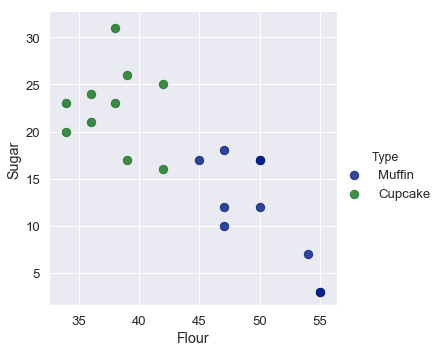

In [5]:
# plot our data

sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='dark6',fit_reg=False,scatter_kws={"s":70});

In [6]:
# format or preprocess our data

type_label=np.where(recipes['Type']=='Muffin',0,1)

recipe_features=recipes.columns.values[1:].tolist()
print(recipe_features)

ingredients=recipes[['Flour','Sugar']].values
print(ingredients)


['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']
[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [7]:
# fit model

model=svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
# get the seperating hyperplane

w=model.coef_[0]
a=-w[0]/w[1]
print(a)
print(" ")
xx=np.linspace(30,60)
print(xx)
print(" ")
yy=a * xx-(model.intercept_[0]/w[1])
print(yy)



-857617921181270.0
 
[30.         30.6122449  31.2244898  31.83673469 32.44897959 33.06122449
 33.67346939 34.28571429 34.89795918 35.51020408 36.12244898 36.73469388
 37.34693878 37.95918367 38.57142857 39.18367347 39.79591837 40.40816327
 41.02040816 41.63265306 42.24489796 42.85714286 43.46938776 44.08163265
 44.69387755 45.30612245 45.91836735 46.53061224 47.14285714 47.75510204
 48.36734694 48.97959184 49.59183673 50.20408163 50.81632653 51.42857143
 52.04081633 52.65306122 53.26530612 53.87755102 54.48979592 55.10204082
 55.71428571 56.32653061 56.93877551 57.55102041 58.16326531 58.7755102
 59.3877551  60.        ]
 
[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751405e+15  7.90244185e+15
  7.37736965e+15  6.85229746e+15  6.32722526e+15  5.80215306e+15
  5.27708087e+15  4.75200867e+15  4.22693647e+15  3.70186428e+15
  3.17679208e+15  2.65171988e+15  2.12664769e+15  1.60157549e+15
  1.07650329e+15  5.51431096e+14  2.6358899

In [9]:


# plot the parallel to the seperating hyperplane that pass through the support vevtor
b=model.support_vectors_[0]
yy_down=a* xx + (b[1]- a * b[0])
b=model.support_vectors_[-1]
yy_up=a * xx + (b[1] - a * b[0])



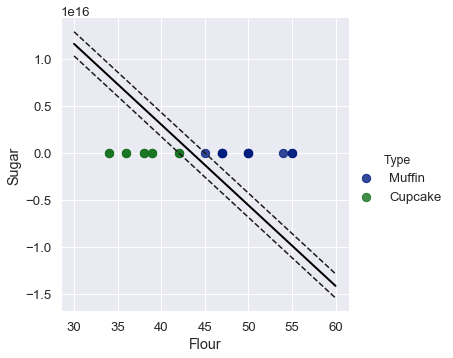

In [10]:
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='dark6',fit_reg=False,scatter_kws={"s":70});

plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [11]:
#to create function to predict muffin or cupcake

def muffin_or_cupcake(Flour,Sugar):
    if(model.predict([[Flour,Sugar]]))==0:
        print('you\'re looking at muffin reciepe!')
    else:
        print('your\'re looking at cupcake reciepe!')

In [12]:
#predict if 50 part flour and 20 part sugar
muffin_or_cupcake(50,20)

you're looking at muffin reciepe!


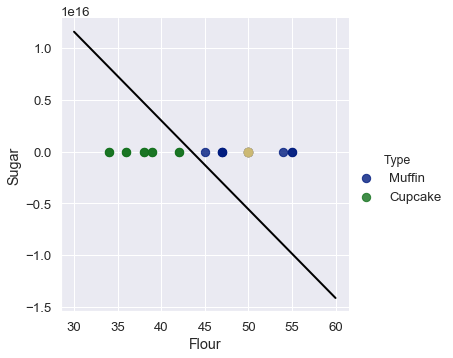

In [13]:
#lets plot on this graph

sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='dark6',fit_reg=False,scatter_kws={"s":70});
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(50,20,'yo',markersize='9')
